### To predict the movement of stock prices, LSTM model is used. Here, we are only predicting the movement of closing price but the similar approach can be followed for other columns as well.
### The model is trained on the stock prices of AAL company which is then tested on other companies.
### As this is a time series prediction, we are considering the prices of past 60 days to predict the future price. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the stock prices of all companies in a dataframe
dataset = pd.read_csv('../input/all_stocks_5yr.csv')

In [3]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# getting the list of all companies 
companies = dataset.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [6]:
# since AAL company is used for training, we are creating a new dataframe with AAL parameters
stock = dataset.loc[dataset['Name'] == 'AAL']
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [7]:
stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
# creating an array with closing prices
training_set = stock.iloc[:, 4:5].values
training_set.shape


(1259, 1)

In [9]:
# normalizing the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled.shape

(1259, 1)

### In the below cell, we are creating 2 arrays, x_train and y_train.
* x_train stores the values of closing prices of past 60(or as specified in timestamp) days
* y_train stores the values of closing prices of the present day

In [11]:
x_train = []
y_train = []
timestamp = 60
length = len(training_set)
print(length)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
print(x_train)
y_train = np.array(y_train)

1259
[[0.03806381 0.03168317 0.02750275 ... 0.08624862 0.0880088  0.08756876]
 [0.03168317 0.02750275 0.03608361 ... 0.0880088  0.08756876 0.08712871]
 [0.02750275 0.03608361 0.02134213 ... 0.08756876 0.08712871 0.0950495 ]
 ...
 [0.73575358 0.73377338 0.72057206 ... 0.90869087 0.8990099  0.85984598]
 [0.73377338 0.72057206 0.72167217 ... 0.8990099  0.85984598 0.80836084]
 [0.72057206 0.72167217 0.71991199 ... 0.85984598 0.80836084 0.83960396]]


In [12]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.03806381 0.03168317 0.02750275 0.03608361 0.02134213 0.03256326
 0.02728273 0.00682068 0.00770077 0.01210121 0.         0.00528053
 0.00858086 0.0090209  0.0129813  0.01936194 0.02266227 0.03410341
 0.03960396 0.04180418 0.04642464 0.05456546 0.06358636 0.07106711
 0.06512651 0.07194719 0.08272827 0.09262926 0.08756876 0.08448845
 0.07876788 0.07678768 0.07986799 0.08690869 0.08030803 0.05984598
 0.05522552 0.05874587 0.05940594 0.0620462  0.0589659  0.06072607
 0.06974697 0.06864686 0.05654565 0.07370737 0.0770077  0.06776678
 0.0660066  0.0550055  0.07216722 0.07546755 0.07040704 0.07854785
 0.08338834 0.08536854 0.07876788 0.08624862 0.0880088  0.08756876]


0.08712871287128715


In [13]:
x_train.shape

(1199, 60)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.03806381],
        [0.03168317],
        [0.02750275],
        ...,
        [0.08624862],
        [0.0880088 ],
        [0.08756876]],

       [[0.03168317],
        [0.02750275],
        [0.03608361],
        ...,
        [0.0880088 ],
        [0.08756876],
        [0.08712871]],

       [[0.02750275],
        [0.03608361],
        [0.02134213],
        ...,
        [0.08756876],
        [0.08712871],
        [0.0950495 ]],

       ...,

       [[0.73575358],
        [0.73377338],
        [0.72057206],
        ...,
        [0.90869087],
        [0.8990099 ],
        [0.85984598]],

       [[0.73377338],
        [0.72057206],
        [0.72167217],
        ...,
        [0.8990099 ],
        [0.85984598],
        [0.80836084]],

       [[0.72057206],
        [0.72167217],
        [0.71991199],
        ...,
        [0.85984598],
        [0.80836084],
        [0.83960396]]])

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [16]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
1199/1199 [==============================] - 19s 16ms/step - loss: 0.0403
Epoch 2/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0074
Epoch 3/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 4/25
1199/1199 [==============================] - 13s 10ms/step - loss: 0.0053
Epoch 5/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 6/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 7/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0054
Epoch 8/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 9/25
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 10/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 11/25
1199/1199 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 12/25
1199/1199 [==============================] - 12s 10

### Now the model is trained. We will test the performance of our model by plotting the predicted stock prices and actual stock prices of other companies.

In [17]:
test_set = dataset.loc[dataset['Name'] == 'SIG']   # change CBS to whatever company from the list
test_set = test_set.loc[:, test_set.columns == 'close']

In [18]:
# storing the actual stock prices in y_test starting from 60th day as the previous 60 days are used to predict the present day value.
y_test = test_set.iloc[timestamp:, 0:].values
y_test

array([[69.89],
       [69.89],
       [69.76],
       ...,
       [48.88],
       [49.5 ],
       [50.14]])

In [19]:
# storing all values in a variable for generating an input array for our model 
closing_price = test_set.iloc[:, 0:].values
closing_price_scaled = sc.transform(closing_price)

In [20]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(1199, 60)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1199, 60, 1)

In [22]:
# predicting the stock price values
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[66.29126 ],
       [66.59361 ],
       [66.83222 ],
       ...,
       [53.5433  ],
       [52.865356],
       [52.111496]], dtype=float32)

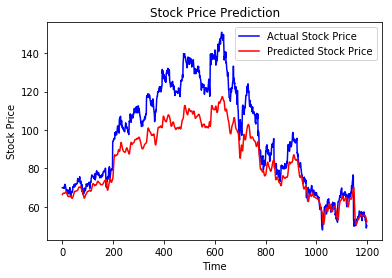

In [23]:
# plotting the results
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()